#### General
Linear Regression: y =  b + Xw

weight = Slope
bias = constant i.e. "offset"

#### Cost Function
Residual: $y_i - \hat{y}_i$
* The difference between prediction and the observed value.   
* Also known as epsilon

Total Error: $ TE = \sum |y_i - \hat{y}_i| = \sum | \epsilon_i | $

Mean Square Error: $ MSE = \frac{1}{N}\sum_{i}(y_i - \hat{y}_i )^2$
   * Large when the error is large and vice versa
   * Smoother and allows for a global minimum

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


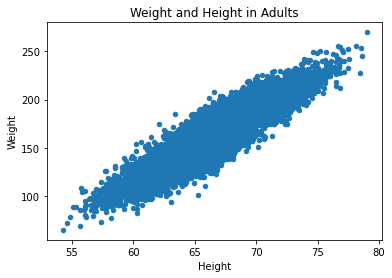

In [4]:
df.plot(kind='scatter',
        x = 'Height',
        y = "Weight",
        title = 'Weight and Height in Adults')

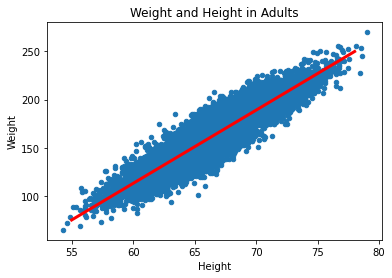

In [5]:
df.plot(kind='scatter',
        x = 'Height',
        y = "Weight",
        title = 'Weight and Height in Adults')

plt.plot([55,78],[75,250],color='red',linewidth=3)

In [6]:
def line(x,w=0,b=0):
    return x * w+b

x = np.linspace(55,88,100)
yhat = line(x,w=0,b=0)

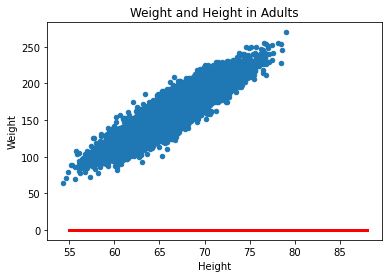

In [7]:
# Zero Slope in the regression
df.plot(kind='scatter',
        x = 'Height',
        y = "Weight",
        title = 'Weight and Height in Adults')

plt.plot(x,yhat,color='red',linewidth=3)

In [8]:
def mean_squared_error(y_true,y_pred):
    s = (y_true-y_pred)**2
    return s.mean()

In [11]:
X = df[['Height']].values
y_true = df[['Weight']].values

In [12]:
y_pred = line(x)
mean_squared_error(y_true,y_pred)

27093.83757456157

Text(0, 0.5, 'MSE')

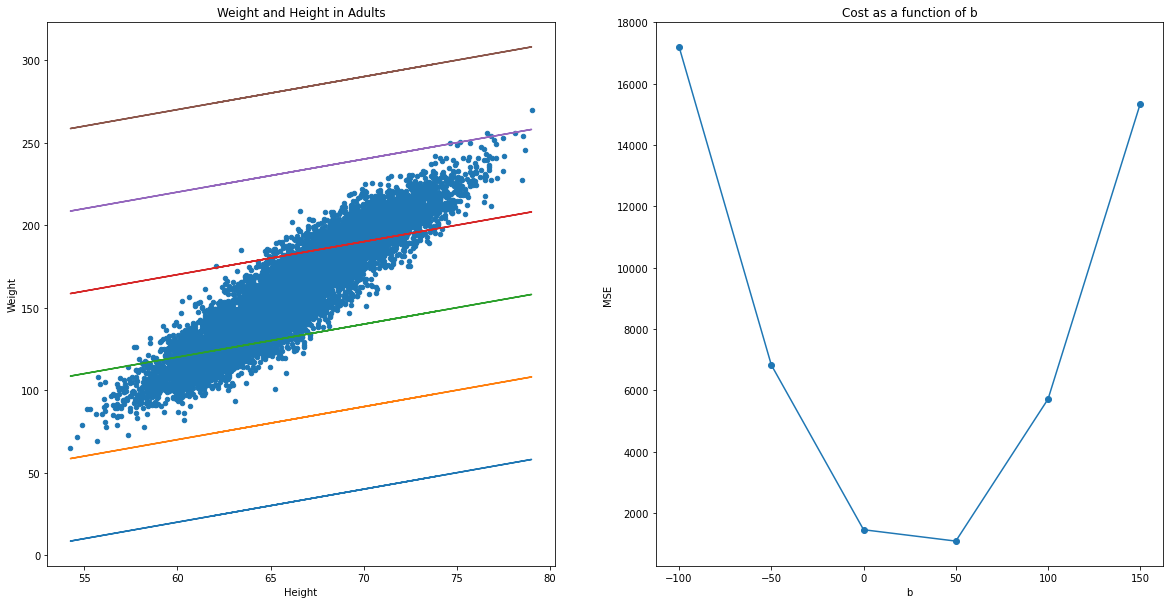

In [13]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)

df.plot(kind='scatter',
        x = 'Height',
        y = "Weight",
        title = 'Weight and Height in Adults',ax=ax1)

bbs = np.array([-100,-50,0,50,100,150])

mses = []

for b in bbs:
    y_pred = line(X,w=2,b=b)
    mses.append(mean_squared_error(y_true,y_pred))
    plt.plot(X,y_pred)
    
    
ax2 = plt.subplot(122)
plt.plot(bbs,mses,'o-')
plt.title("Cost as a function of b")
plt.xlabel('b')
plt.ylabel('MSE')

In [14]:
from keras.models import Sequential # Adding elements in a sequence
from keras.layers import Dense
from keras.optimizers import Adam, SGD # Change our weights and biases

In [15]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))
# 1: Output values, for us this is one output for a linear regression prediction
# Shape: The inputs, for us this is one representing our univariate regression

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(Adam(lr=0.8),'mean_squared_error')
# Construct a model using tensorflow, using our MSE function to measure success i.e. our loss function
# Adam optimization is not discussed in this section
model.fit(X,y_true,epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 487us/step - loss: 1076.4749
Epoch 2/40
313/313 [==============================] - 0s 501us/step - loss: 556.9549
Epoch 3/40
313/313 [==============================] - 0s 497us/step - loss: 515.2164
Epoch 4/40
313/313 [==============================] - 0s 466us/step - loss: 478.5854
Epoch 5/40
313/313 [==============================] - 0s 480us/step - loss: 468.7711
Epoch 6/40
313/313 [==============================] - 0s 463us/step - loss: 398.8297
Epoch 7/40
313/313 [==============================] - 0s 492us/step - loss: 364.3059
Epoch 8/40
313/313 [==============================] - 0s 523us/step - loss: 327.3195
Epoch 9/40
313/313 [==============================] - 0s 502us/step - loss: 296.5144
Epoch 10/40
313/313 [==============================] - 0s 467us/step - loss: 294.0425
Epoch 11/40
313/313 [==============================] - 0s 505us/step - loss: 268.1826
Epoch 12/40
313/313 [==============================] - 0s 497u

In [20]:
y_pred = model.predict(X)

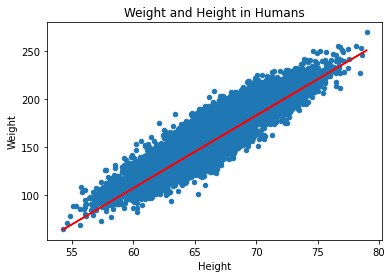

In [21]:
df.plot(kind="scatter",
        x="Height",
        y='Weight',
        title='Weight and Height in Humans')

plt.plot(X,y_pred,color='red')

In [22]:
W,B = model.get_weights()

In [23]:
W

array([[7.584698]], dtype=float32)

In [24]:
B

array([-347.86484], dtype=float32)

### Evaluation of a Model
* $R^2$ is the best baseline value for linear regression comparison.  
    * $R^2 = 1 - \frac{SSres}{SStot}$
    
* Train Test Splits allow us to train our model and utilize the trained model on the test dataset. This allows us to use out-of-sample data to understand our model's generalization upon unseen data. 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y_true,test_size=.2)

In [55]:
len(X_train)

8000

In [56]:
len(X_test)

2000

In [57]:
# Resetting weights for this new model fit
# "DeTraining"
W[0,0] = 0.0
B[0] = 0.0
model.set_weights((W,B))

In [58]:
model.fit(X_train,y_train,epochs=50, verbose=0)# Not outputing the epoch reports

In [59]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error as mse,r2_score

In [64]:
print(f'MSE of Train:\n{mse(y_train,y_train_pred)}')
print(f'MSE of Test:\n{mse(y_test,y_test_pred)}')

MSE of Train:
191.67813305363822
MSE of Test:
202.75832141412252


In [65]:
print(f'R2 score of Train:\n{r2_score(y_train,y_train_pred)}')
print(f'R2 score of Test:\n{r2_score(y_test,y_test_pred)}')

R2 score of Train:
0.811922335099708
R2 score of Test:
0.81170497454504


### Feature Preprocessing

In [67]:
# Went over pd.get_dummies, but we know how that works

### Rescaling
* based on the context of the data on hand

In [70]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


### MinMax Normalization
* Setting values between 0 and 1

In [71]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df['Weight_MMS'] = mms.fit_transform(df[['Weight']])
df['Height_MMS'] = mms.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_MMS,Height_MMS
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


### Standard Normalization

In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df['Weight_SS'] = ss.fit_transform(df[['Weight']])
df['Height_SS'] = ss.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_MMS,Height_MMS,Weight_SS,Height_SS
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


### Plotting The Features

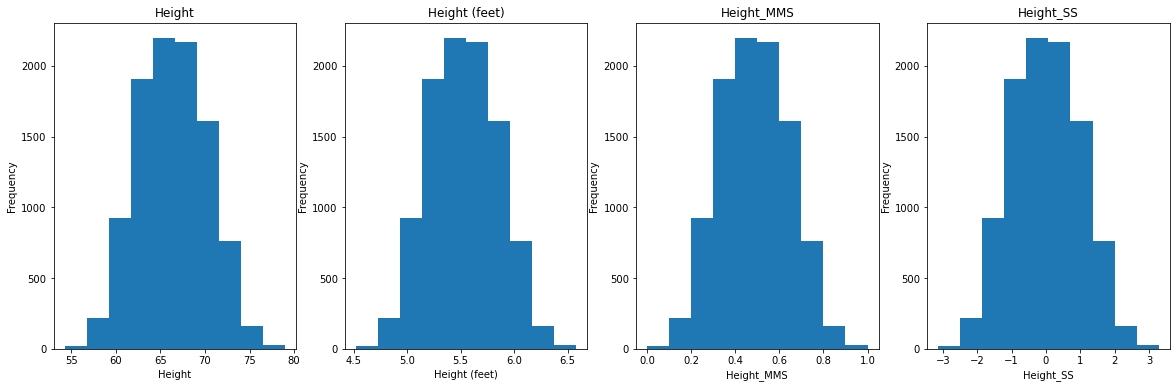

In [76]:
plt.figure(figsize=(20,6))

for i, feature in enumerate(['Height','Height (feet)','Height_MMS','Height_SS']):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)

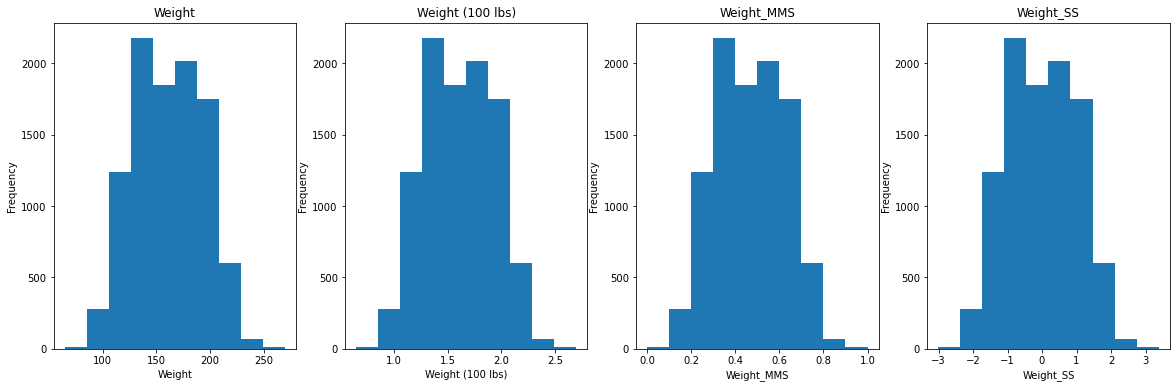

In [77]:
plt.figure(figsize=(20,6))

for i, feature in enumerate(['Weight','Weight (100 lbs)','Weight_MMS','Weight_SS']):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)